# e.g. 4: Compare MOC control v0,v1 and forecasts

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

BEGIN
hostname= oa-32-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
cafe_files_control= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p9f1/Omon/msftyz/gn/v20171025/msftyz_Omon_piControl_CAFE-1-0_r1i1p9f1_gn_047101-048012.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p9f1/Omon/msftyz/gn/v20171025/msftyz_Omon_piControl_CAFE-1-0_r1i1p9f1_gn_048101-049012.nc', '/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p9f1/Omon/msftyz/gn/v20171025/msftyz_Omon_piControl_CAFE-1-0_r1i1p9f1_gn_049101-050012.nc']]
cafe_monthly_files_1st= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r2i1p1f1/Omon/msftyz/gn/v20171025/msftyz_Omon_historical_CAFE-1-0_r2i1p1f1_gn_201601-202012.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r3i1p1f1/Omon/msftyz/gn/v20171025/msftyz_Omon_historical_CAFE-1-0_r3i1p1f1_gn_201601-202012.nc'], ['

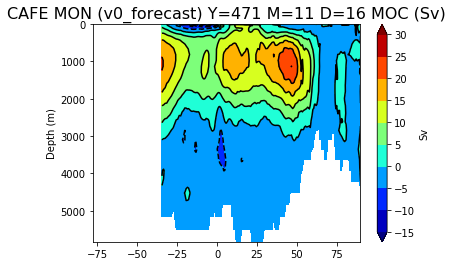

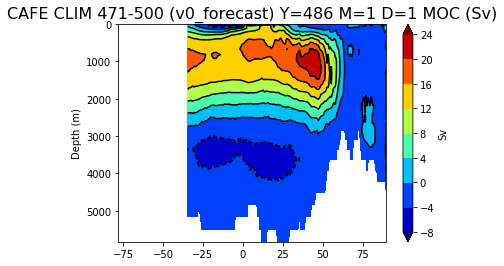

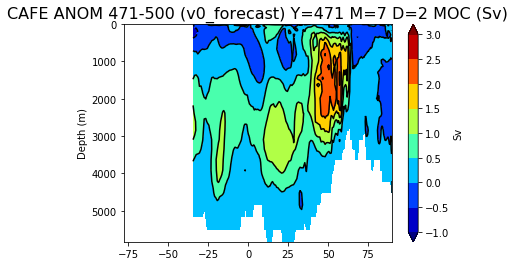

n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
Diag= False
monthly_clim_anom: Produce annual output rather than monthly.
monthly_clim_anom: All years have 12 months.
cafe_moc_from_monthly_1st.shape= (60, 10, 3, 50, 300)


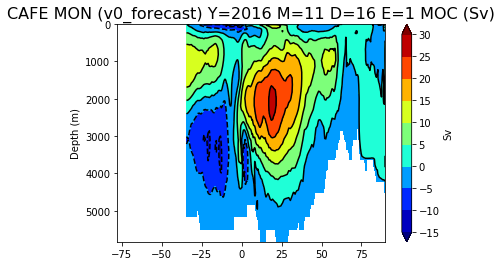

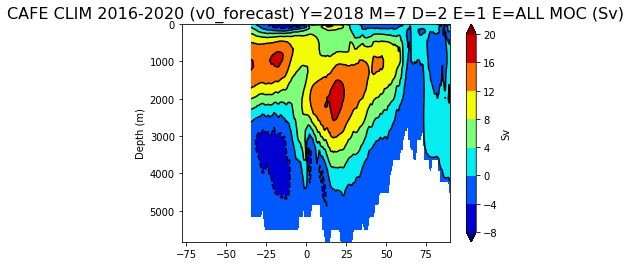

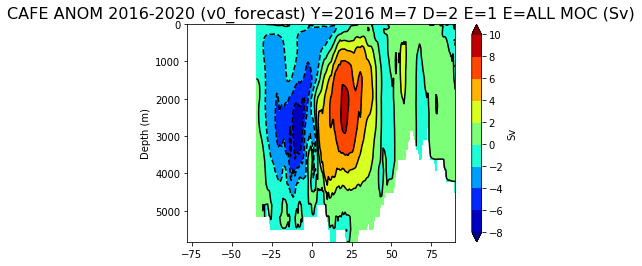

n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
Diag= False
monthly_clim_anom: Produce annual output rather than monthly.
monthly_clim_anom: All years have 12 months.


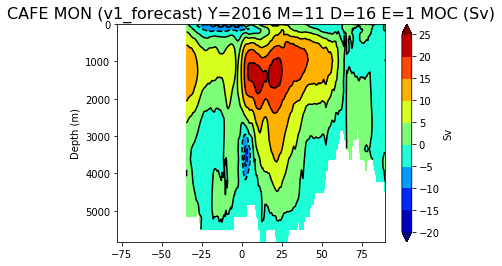

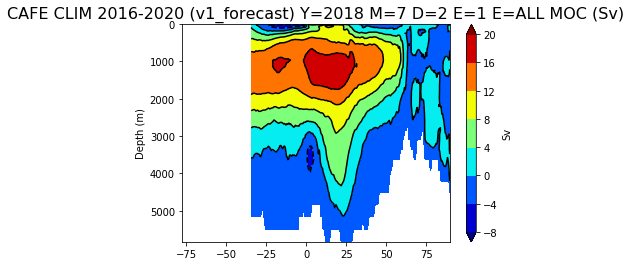

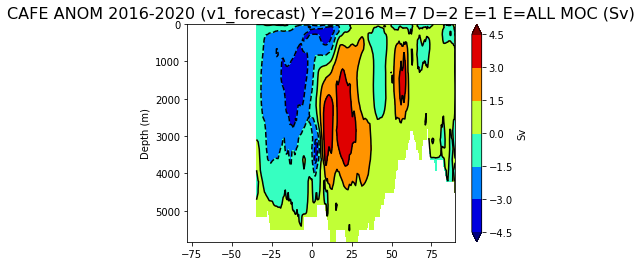

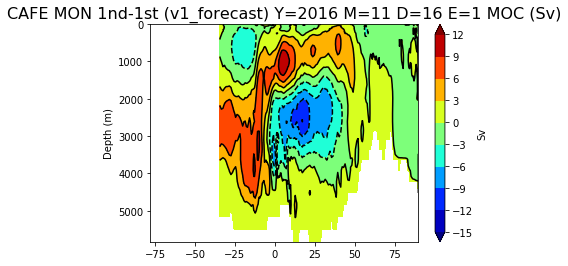

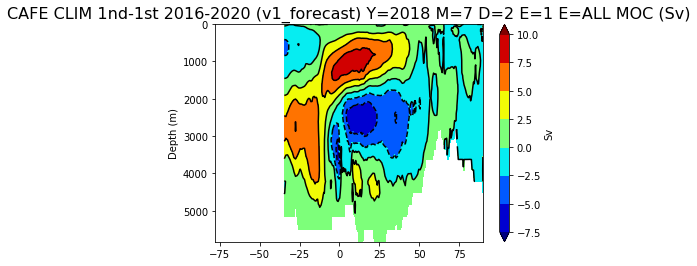

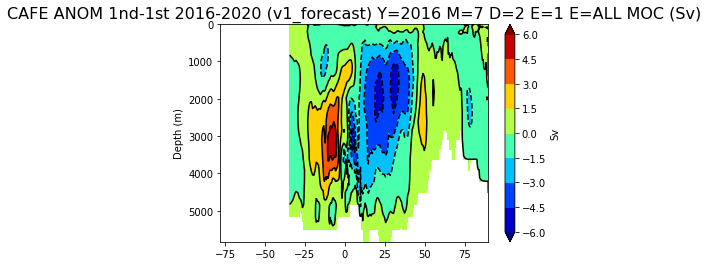

END


In [7]:
print('BEGIN')

import socket
import re
import os

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-32-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):
  
  %matplotlib inline

  __file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

  import sys
  import inspect
  from decadal_diag import n_data_funcs  
  import cartopy.crs as ccrs
  from cartopy.util import add_cyclic_point
  import numpy as np
  
  from decadal_diag import \
    fractional_year_from_num2date, \
    generate_daily_month_indices, \
    shade_2d_latlon, \
    get_timestamp_number
  
  model='CAFE'
  
  cafe_control_calendar='noleap'
  grid_label='gn'
    
  cafe_experiment_titles = {1:'v0_forecast', 4:'v1_forecast', 3:'v2_forecast', 9:'v1', 5:'v2', 6:'v3', 7:'aug17p'}
  
  #experiment='v1';
  pval=9

  ivar_str_cafe='msftyz';offset=0.0;scale=1e-9;long_name='Meridional Overturning Streamfunction';short_name='MOC';units='Sv';table='Omon'

  idir_control=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/piControl/r1i1p'+str(pval)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'

  ifils_control= \
    [ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_046101-047012.nc' \
    ,ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_047101-048012.nc' \
    ,ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_048101-049012.nc' \
    ,ivar_str_cafe+'_'+table+'_piControl_CAFE-1-0_r1i1p'+str(pval)+'f1_gn_049101-050012.nc' \
    ]

  #no ensembles 3 input files...
  cafe_files_control=[[idir_control+'/'+ifils_control[1],idir_control+'/'+ifils_control[2], idir_control+'/'+ifils_control[3]]]

  print('cafe_files_control=',cafe_files_control)

  pval_1st=1 #v1_forecast
  cafe_monthly_files_1st,cafe_monthly_files_flat_1st=[],[]
  for ensemble in range(2,11+1):
    cafe_inner_monthly_files_1st=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval_1st)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils_1st=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval_1st)+'f1_gn_201601-202012.nc'] #1 file
    for file in monthly_ifils_1st:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files_1st.append(idir+'/'+file)
    cafe_monthly_files_1st.append(cafe_inner_monthly_files_1st)

  print('cafe_monthly_files_1st=',cafe_monthly_files_1st)

  pval_2nd=4 #v0_forecast
  cafe_monthly_files_2nd,cafe_monthly_files_flat_2nd=[],[]
  for ensemble in range(2,11+1):
    cafe_inner_monthly_files_2nd=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval_2nd)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils_2nd=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval_2nd)+'f1_gn_201601-202012.nc'] #1 file
    for file in monthly_ifils_2nd:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files_2nd.append(idir+'/'+file)
    cafe_monthly_files_2nd.append(cafe_inner_monthly_files_2nd)

  print('cafe_monthly_files_2nd=',cafe_monthly_files_2nd)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  from decadal_diag import \
    fractional_year_from_num2date, \
    generate_daily_month_indices, \
    shade_2d_latlon, \
    get_timestamp_number, \
    shade_2d_curvilinear, \
    shade_2d_simple

  grid_label='cafep'
  cafe_calendar='julian'
  
  basin=0;basins=['Atlantic','IndPac','Global']
  
#===============================================================================

  cbeg=471
  cend=500
  abeg=471
  aend=500
  
  month_to_plot=10 #base 0
  year_to_plot=0 #base 0
  
  cafe_monthly_files_control=n_data_funcs(Diag=False,input_files=cafe_files_control,input_var_name=ivar_str_cafe)

  cafe_monthly_files_control.calculate_filedatetime_info(Diag=False,calendar=cafe_control_calendar)

  cafe_monthly_files_control.get_latlon_info(Diag=False, lat='lat', lon=None)

  cafe_monthly_files_control.get_lev_info(Diag=False)

  cafe_moc_from_monthly_control=cafe_monthly_files_control.calculate_quantity('dummy', Diag=False, quantity='msftyz')

  print('cafe_moc_from_monthly_control.shape=',cafe_moc_from_monthly_control.shape)  
  
  cafe_moc_annual_climatology_from_monthly_control, \
  cafe_moc_annual_anomaly_from_monthly_control=cafe_monthly_files_control.monthly_clim_anom( \
    Diag=False, input=cafe_moc_from_monthly_control, AnnOut=True, ZeroClim=False)
  
  clevs=None

  shade_2d_simple(cafe_moc_from_monthly_control[month_to_plot,basin,]*scale+offset, \
  title=model+' MON ('+cafe_experiment_titles[pval_1st]+')'+ \
  ' Y='+str(cafe_monthly_files_control.date_time_stamp_tfreq[month_to_plot].year)+ \
  ' M='+str(cafe_monthly_files_control.date_time_stamp_tfreq[month_to_plot].month)+ \
  ' D='+str(cafe_monthly_files_control.date_time_stamp_tfreq[month_to_plot].day)+ \
  ' '+short_name, \
  xyvals=(cafe_monthly_files_control.lat[:],cafe_monthly_files_control.lev[:]), add_contours=True, \
  units='Sv',clevs=clevs,extend='both',cmap='jet',reverse_yaxis=True,ylab='Depth (m)')

  ###
  
  shade_2d_simple(cafe_moc_annual_climatology_from_monthly_control[basin,]*scale+offset, \
    title=model+' CLIM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_monthly_files_control.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_monthly_files_control.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_monthly_files_control.date_time_stamp_climatology.day)+ \
    ' '+short_name, \
    xyvals=(cafe_monthly_files_control.lat[:],cafe_monthly_files_control.lev[:]), add_contours=True, \
    units='Sv',clevs=clevs,extend='both',cmap='jet',reverse_yaxis=True,ylab='Depth (m)')

  shade_2d_simple(cafe_moc_annual_anomaly_from_monthly_control[year_to_plot,basin,]*scale+offset, \
    title=model+' ANOM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_monthly_files_control.date_time_stamp_anomaly[year_to_plot].year)+ \
    ' M='+str(cafe_monthly_files_control.date_time_stamp_anomaly[year_to_plot].month)+ \
    ' D='+str(cafe_monthly_files_control.date_time_stamp_anomaly[year_to_plot].day)+ \
    ' '+short_name, \
    xyvals=(cafe_monthly_files_control.lat[:],cafe_monthly_files_control.lev[:]), add_contours=True, \
    units='Sv',clevs=clevs,extend='both',cmap='jet',reverse_yaxis=True,ylab='Depth (m)')

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  month_to_plot=10 #base 0
  year_to_plot=0 #base 0
  ensemble_to_plot=1 #base 0
  
  cbeg=2016
  cend=2020
  abeg=2016
  aend=2020
  
  cafe_monthly_files_1st=n_data_funcs(input_files=cafe_monthly_files_1st,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files_1st.calculate_filedatetime_info(Diag=False,calendar=cafe_calendar)
  
  cafe_monthly_files_1st.get_latlon_info(Diag=False,lat='lat',lon=None)
  
  cafe_monthly_files_1st.get_lev_info(Diag=False)

  cafe_moc_from_monthly_1st=cafe_monthly_files_1st.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_moc_annual_climatology_from_monthly_1st,cafe_moc_annual_anomaly_from_monthly_1st=cafe_monthly_files_1st.monthly_clim_anom( \
    Diag=False, input=cafe_moc_from_monthly_1st, AnnOut=True, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  clevs=None

  print('cafe_moc_from_monthly_1st.shape=',cafe_moc_from_monthly_1st.shape)  

  shade_2d_simple(cafe_moc_from_monthly_1st[month_to_plot,ensemble_to_plot,basin,]*scale+offset, \
    title=model+' MON ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_monthly_files_1st.date_time_stamp_tfreq[0][month_to_plot].year)+ \
    ' M='+str(cafe_monthly_files_1st.date_time_stamp_tfreq[0][month_to_plot].month)+ \
    ' D='+str(cafe_monthly_files_1st.date_time_stamp_tfreq[0][month_to_plot].day)+ \
    ' E='+str(ensemble_to_plot)+' '+short_name, \
    xyvals=(cafe_monthly_files_1st.lat[:],cafe_monthly_files_1st.lev[:]), add_contours=True, \
    units='Sv',clevs=clevs,extend='both',cmap='jet',reverse_yaxis=True,ylab='Depth (m)')

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  shade_2d_simple(np.average(cafe_moc_annual_climatology_from_monthly_1st[:,basin,],axis=0)*scale+offset, \
    title=model+' CLIM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_monthly_files_1st.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_monthly_files_1st.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_monthly_files_1st.date_time_stamp_climatology.day)+ \
    ' E='+str(ensemble_to_plot)+' E=ALL'+' '+short_name, \
    xyvals=(cafe_monthly_files_1st.lat[:],cafe_monthly_files_1st.lev[:]), add_contours=True, \
    units='Sv',clevs=clevs,extend='both',cmap='jet',reverse_yaxis=True,ylab='Depth (m)')
  
  shade_2d_simple(np.average(cafe_moc_annual_anomaly_from_monthly_1st[year_to_plot,:,basin,],axis=0)*scale+offset, \
    title=model+' ANOM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_monthly_files_1st.date_time_stamp_anomaly[year_to_plot].year)+ \
    ' M='+str(cafe_monthly_files_1st.date_time_stamp_anomaly[year_to_plot].month)+ \
    ' D='+str(cafe_monthly_files_1st.date_time_stamp_anomaly[year_to_plot].day)+ \
    ' E='+str(ensemble_to_plot)+' E=ALL'+' '+short_name, \
    xyvals=(cafe_monthly_files_1st.lat[:],cafe_monthly_files_1st.lev[:]), add_contours=True, \
    units='Sv',clevs=clevs,extend='both',cmap='jet',reverse_yaxis=True,ylab='Depth (m)')
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  cafe_monthly_files_2nd=n_data_funcs(input_files=cafe_monthly_files_2nd,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files_2nd.calculate_filedatetime_info(Diag=False,calendar=cafe_calendar)
  
  cafe_monthly_files_2nd.get_latlon_info(Diag=False,lat='lat',lon=None)
  
  cafe_monthly_files_2nd.get_lev_info(Diag=False)

  cafe_moc_from_monthly_2nd=cafe_monthly_files_2nd.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_moc_annual_climatology_from_monthly_2nd,cafe_moc_annual_anomaly_from_monthly_2nd=cafe_monthly_files_2nd.monthly_clim_anom( \
    Diag=False, input=cafe_moc_from_monthly_2nd, AnnOut=True, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
  clevs=None

  shade_2d_simple(cafe_moc_from_monthly_2nd[month_to_plot,ensemble_to_plot,basin,]*scale+offset, \
    title=model+' MON ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_monthly_files_2nd.date_time_stamp_tfreq[0][month_to_plot].year)+ \
    ' M='+str(cafe_monthly_files_2nd.date_time_stamp_tfreq[0][month_to_plot].month)+ \
    ' D='+str(cafe_monthly_files_2nd.date_time_stamp_tfreq[0][month_to_plot].day)+ \
    ' E='+str(ensemble_to_plot)+' '+short_name, \
    xyvals=(cafe_monthly_files_1st.lat[:],cafe_monthly_files_1st.lev[:]), add_contours=True, \
    units='Sv',clevs=clevs,extend='both',cmap='jet',reverse_yaxis=True,ylab='Depth (m)')

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  shade_2d_simple(np.average(cafe_moc_annual_climatology_from_monthly_2nd[:,basin,],axis=0)*scale+offset, \
    title=model+' CLIM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_monthly_files_2nd.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_monthly_files_2nd.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_monthly_files_2nd.date_time_stamp_climatology.day)+ \
    ' E='+str(ensemble_to_plot)+' E=ALL'+' '+short_name, \
    xyvals=(cafe_monthly_files_1st.lat[:],cafe_monthly_files_1st.lev[:]), add_contours=True, \
    units='Sv',clevs=clevs,extend='both',cmap='jet',reverse_yaxis=True,ylab='Depth (m)')
  
  shade_2d_simple(np.average(cafe_moc_annual_anomaly_from_monthly_2nd[year_to_plot,:,basin,],axis=0)*scale+offset, \
    title=model+' ANOM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_monthly_files_2nd.date_time_stamp_anomaly[year_to_plot].year)+ \
    ' M='+str(cafe_monthly_files_2nd.date_time_stamp_anomaly[year_to_plot].month)+ \
    ' D='+str(cafe_monthly_files_2nd.date_time_stamp_anomaly[year_to_plot].day)+ \
    ' E='+str(ensemble_to_plot)+' E=ALL'+' '+short_name, \
    xyvals=(cafe_monthly_files_2nd.lat[:],cafe_monthly_files_2nd.lev[:]), add_contours=True, \
    units='Sv',clevs=clevs,extend='both',cmap='jet',reverse_yaxis=True,ylab='Depth (m)')
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  shade_2d_simple(cafe_moc_from_monthly_2nd[month_to_plot,ensemble_to_plot,basin,]*scale+offset-cafe_moc_from_monthly_1st[month_to_plot,ensemble_to_plot,basin,]*scale+offset, \
    title=model+' MON 1nd-1st ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_monthly_files_2nd.date_time_stamp_tfreq[0][month_to_plot].year)+ \
    ' M='+str(cafe_monthly_files_2nd.date_time_stamp_tfreq[0][month_to_plot].month)+ \
    ' D='+str(cafe_monthly_files_2nd.date_time_stamp_tfreq[0][month_to_plot].day)+ \
    ' E='+str(ensemble_to_plot)+' '+short_name, \
    xyvals=(cafe_monthly_files_1st.lat[:],cafe_monthly_files_1st.lev[:]), add_contours=True, \
    units='Sv',clevs=clevs,extend='both',cmap='jet',reverse_yaxis=True,ylab='Depth (m)')

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  shade_2d_simple(np.average(cafe_moc_annual_climatology_from_monthly_2nd[:,basin,],axis=0)*scale+offset-np.average(cafe_moc_annual_climatology_from_monthly_1st[:,basin,],axis=0)*scale+offset, \
    title=model+' CLIM 1nd-1st '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_monthly_files_2nd.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_monthly_files_2nd.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_monthly_files_2nd.date_time_stamp_climatology.day)+ \
    ' E='+str(ensemble_to_plot)+' E=ALL'+' '+short_name, \
    xyvals=(cafe_monthly_files_1st.lat[:],cafe_monthly_files_1st.lev[:]), add_contours=True, \
    units='Sv',clevs=clevs,extend='both',cmap='jet',reverse_yaxis=True,ylab='Depth (m)')
  
  shade_2d_simple(np.average(cafe_moc_annual_anomaly_from_monthly_2nd[year_to_plot,:,basin,],axis=0)*scale+offset-np.average(cafe_moc_annual_anomaly_from_monthly_1st[year_to_plot,:,basin,],axis=0)*scale+offset, \
    title=model+' ANOM 1nd-1st '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_monthly_files_2nd.date_time_stamp_anomaly[year_to_plot].year)+ \
    ' M='+str(cafe_monthly_files_2nd.date_time_stamp_anomaly[year_to_plot].month)+ \
    ' D='+str(cafe_monthly_files_2nd.date_time_stamp_anomaly[year_to_plot].day)+ \
    ' E='+str(ensemble_to_plot)+' E=ALL'+' '+short_name, \
    xyvals=(cafe_monthly_files_2nd.lat[:],cafe_monthly_files_2nd.lev[:]), add_contours=True, \
    units='Sv',clevs=clevs,extend='both',cmap='jet',reverse_yaxis=True,ylab='Depth (m)')
  
#===============================================================================

print('END')